In [ ]:
#Import module yang dibutuhkan
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
#upload file
from google.colab import files
upload = files.upload()

Saving CarPrice.csv to CarPrice.csv


In [ ]:
#cek data
CarPrice_df = pd.read_csv("CarPrice.csv")
CarPrice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
CarPrice_df.shape

(205, 26)

In [ ]:
print(CarPrice_df.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

In [ ]:
#cek atribut apa saja di dalam data
CarPrice_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Setelah saya cek semua scatter plot dari masing-masing atribut, saya tertarik menganalisis harga mobil berdasarkan fisikal pada mobil.

In [ ]:
cdf = CarPrice_df[['carlength', 'carwidth', 'wheelbase', 'curbweight','enginesize','price']]
cdf.head(9)

,carlength,carwidth,wheelbase,curbweight,enginesize,price
0,168.8,64.1,88.6,2548,130,13495.0
1,168.8,64.1,88.6,2548,130,16500.0
2,171.2,65.5,94.5,2823,152,16500.0
3,176.6,66.2,99.8,2337,109,13950.0
4,176.6,66.4,99.4,2824,136,17450.0
5,177.3,66.3,99.8,2507,136,15250.0
6,192.7,71.4,105.8,2844,136,17710.0
7,192.7,71.4,105.8,2954,136,18920.0
8,192.7,71.4,105.8,3086,131,23875.0


In [ ]:
CarPrice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


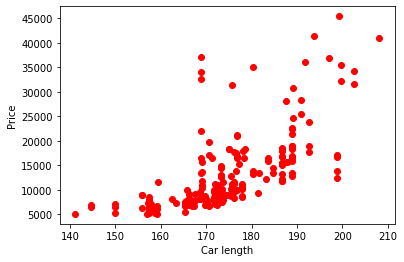

In [ ]:
#buat plot scatter yang dipilih

plt.scatter(cdf.carlength, cdf.price, color = 'red')
plt.xlabel("Car length")
plt.ylabel("Price")
plt.show()

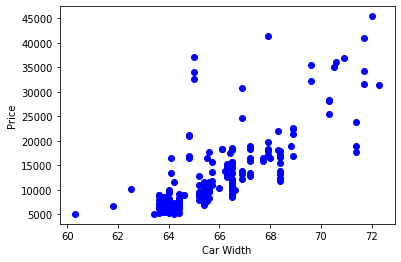

In [ ]:
plt.scatter(cdf.carwidth, cdf.price, color = 'blue')
plt.xlabel("Car Width")
plt.ylabel("Price")
plt.show()

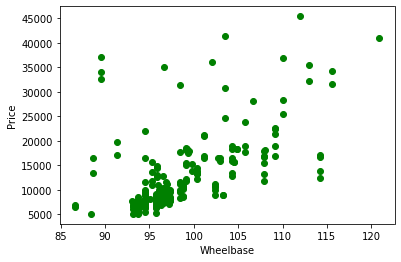

In [ ]:
plt.scatter(cdf.wheelbase, cdf.price, color = 'green')
plt.xlabel("Wheelbase")
plt.ylabel("Price")
plt.show()

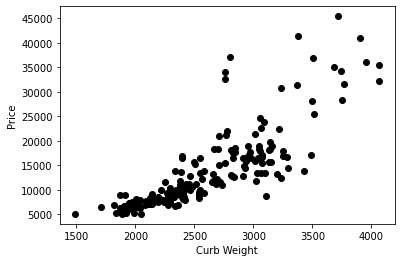

In [ ]:
plt.scatter(cdf.curbweight, cdf.price, color = 'black')
plt.xlabel("Curb Weight")
plt.ylabel("Price")
plt.show()

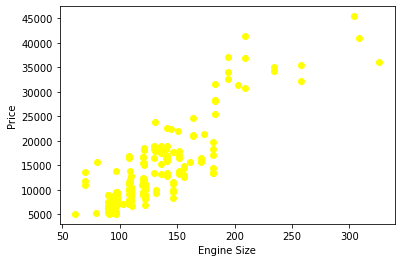

In [ ]:
plt.scatter(cdf.enginesize, cdf.price, color = 'yellow')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [ ]:
#memisah data uji dan data latih dgn perbandingan 8:2
msk = np.random.rand(len(CarPrice_df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

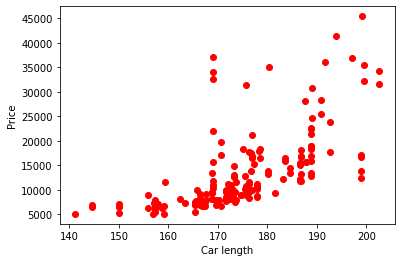

In [ ]:
plt.scatter(train.carlength, train.price, color = 'red')
plt.xlabel("Car length")
plt.ylabel("Price")
plt.show()

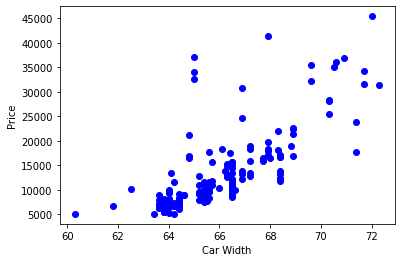

In [ ]:
plt.scatter(train.carwidth, train.price, color = 'blue')
plt.xlabel("Car Width")
plt.ylabel("Price")
plt.show()

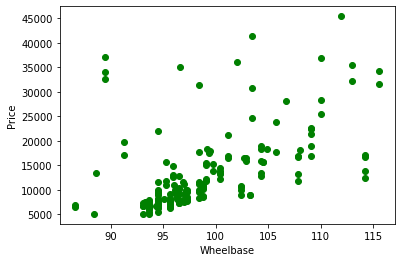

In [ ]:
plt.scatter(train.wheelbase, train.price, color = 'green')
plt.xlabel("Wheelbase")
plt.ylabel("Price")
plt.show()

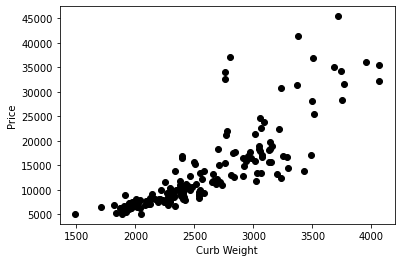

In [ ]:
plt.scatter(train.curbweight, train.price, color = 'black')
plt.xlabel("Curb Weight")
plt.ylabel("Price")
plt.show()

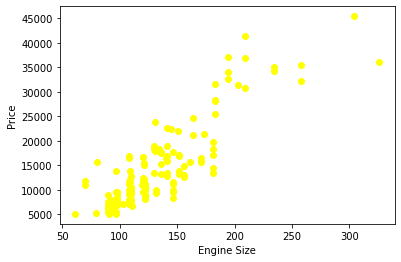

In [ ]:
plt.scatter(train.enginesize, train.price, color = 'yellow')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [ ]:
#membuat model

from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['wheelbase', 'carlength', 'carwidth','curbweight','enginesize']])
y = np.asanyarray(train[['price']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[-113.6072556   -61.39814033  758.20780883    5.11586052  108.04040992]]
Intercept:  [-41532.9366005]


Harga dari mobil tersebut ditentukan dengan rumus berikut
$y = -113.6072556x_1 - 61.39814033x_2 + 758.20780883x_3 + 5.11586052x_4 + 108.04040992x_5 -41532.9366005$

$y$ : harga mobil,
$x_1$ : wheelbase, $x_2$ : car length, $x_3$ : car width, $x_4$ : curbweigth, $x_5$ : engine size

Algoritma/ide:
1. Import module yang dibutuhkan
2. upload data dan cek data
3. buat scatter plot yang bertujuan untuk atribut apa saja yang menarik untuk diteliti
4. Pilih atribut yang menarik untuk diteliti, disini saya memilih wheelbase, car length, car width, curbweight, dan engine size (fisikal mobil)
5. Buat model linier
6. dapatkan persamaan hubungan harga mobil dengan atribut yang dipilih

Keterangan : disini saya memilih model regresi linear multivariabel karena kasus pada nomor 4 ini berhubungan dengan tebakan harga yang bergantung pada feature/atribut yang mempengaruhinya.